## Advanced Regression Assignment

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# To display all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# This will be required to scale the data.
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# model building packages
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale

In [2]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

In [3]:
# Importing train.csv

Surprise_housing = pd.read_csv('train.csv')
Surprise_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Normal check of Surprise_housing data

In [4]:
# checking tail of the data
Surprise_housing.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
# checking Shape of the data
Surprise_housing.shape

(1460, 81)

In [6]:
# Summary of given data set 
Surprise_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Inforamation of data
Surprise_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
# Checking for duplicates
Surprise_housing.loc[Surprise_housing.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


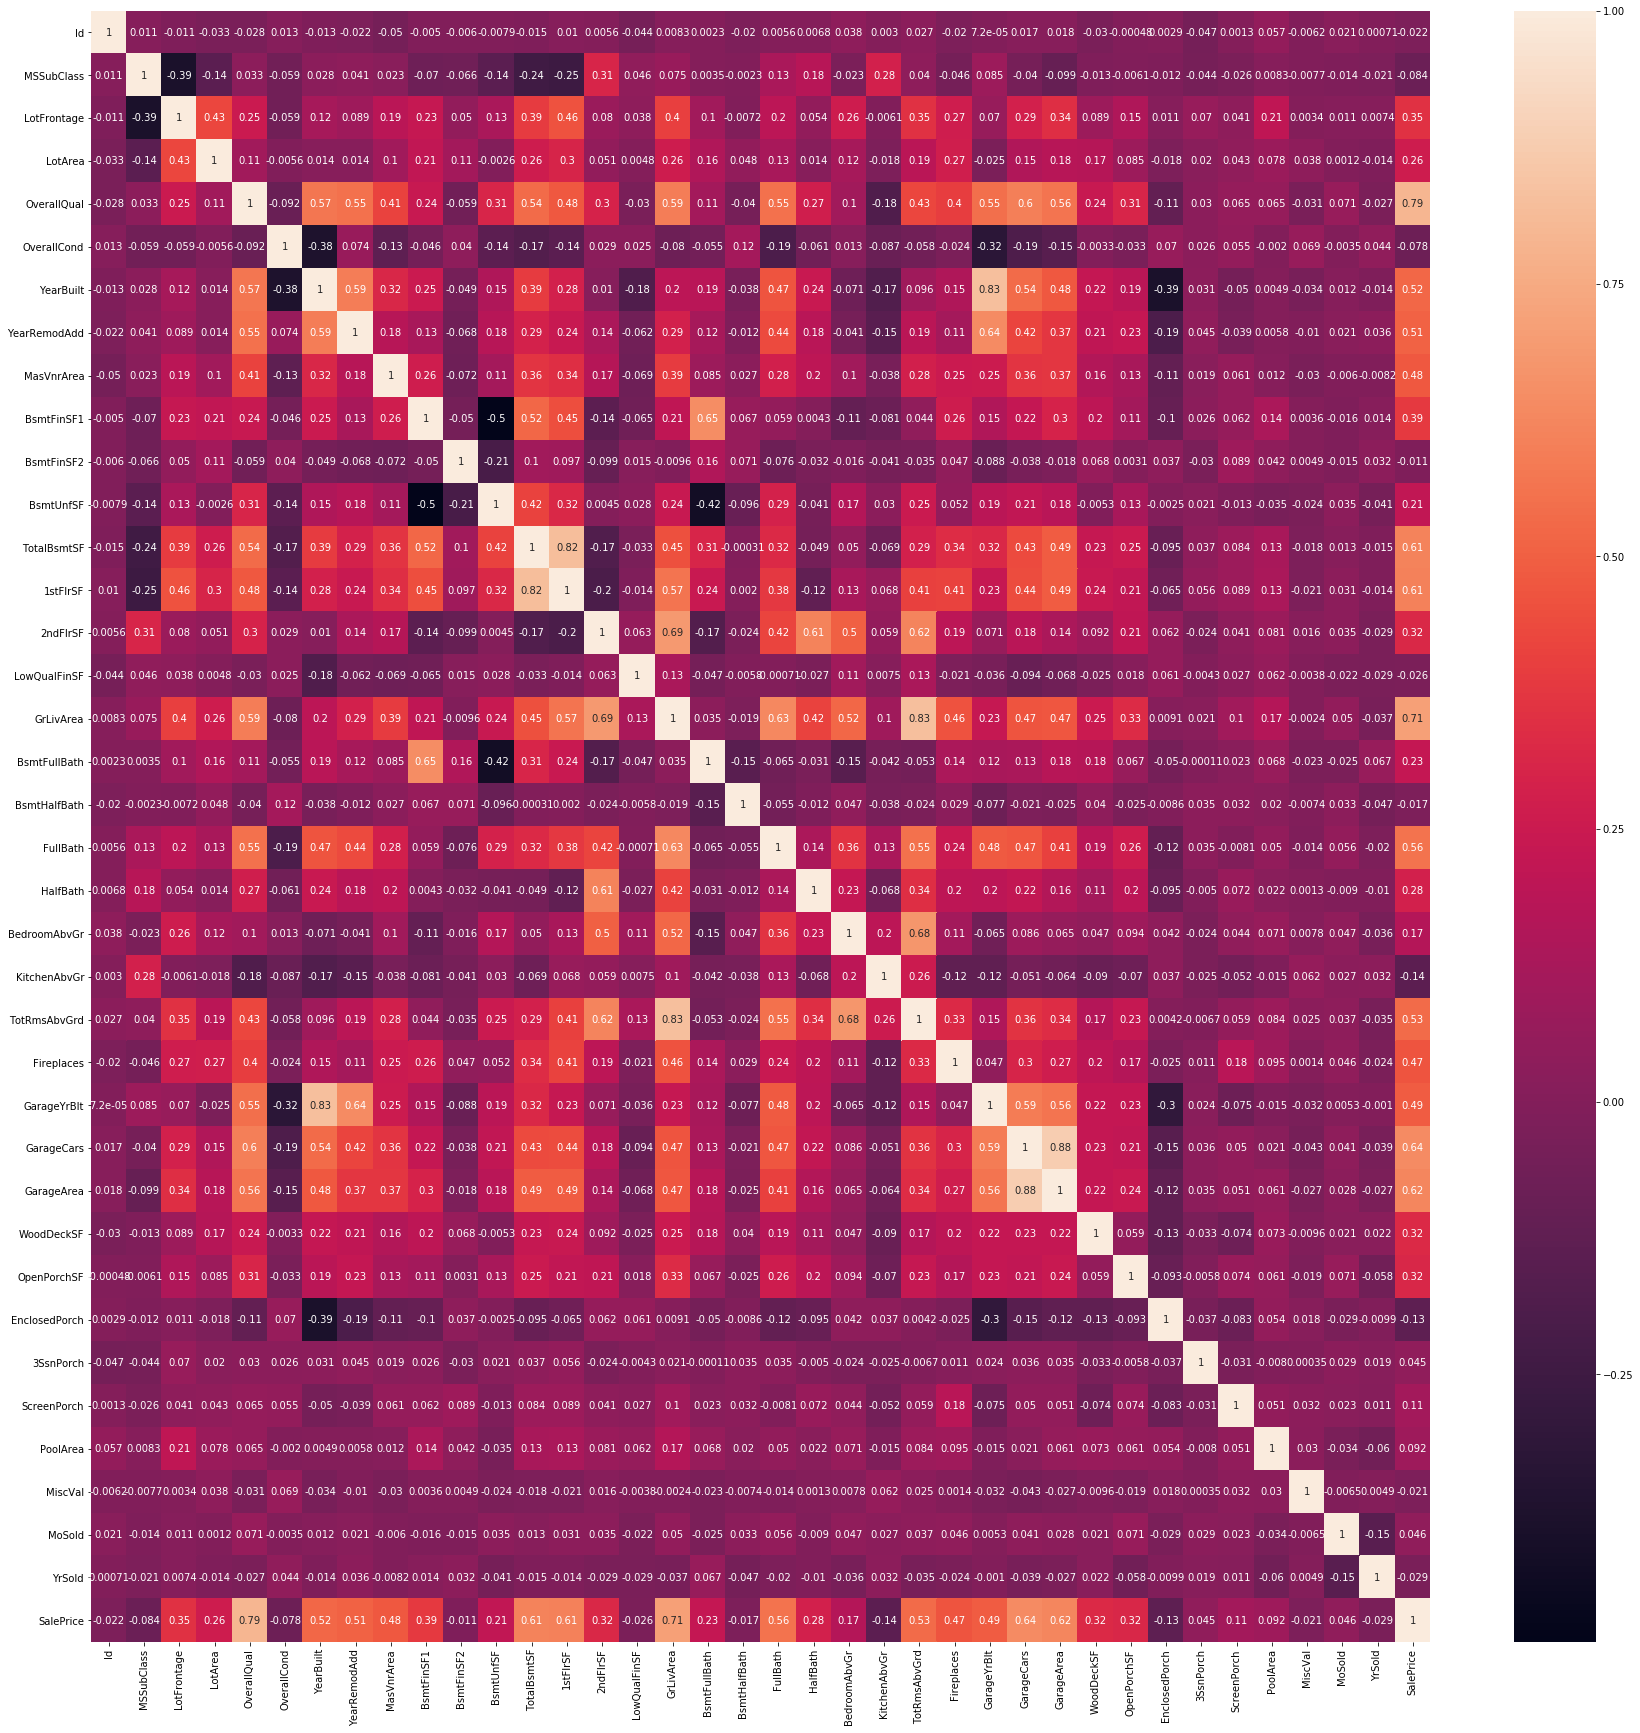

In [9]:
# Plotting correlations on heatmap
corr = Surprise_housing.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True)

Conclusion:
- We can see from above heatmap that the House Sale Price is majorly dependent on variables like OverallQual, YearBuilt GrLivArea,TotalBsmtSF, 1st FlrSF, GarageCars, GarageArea, Pool Area etc.
- Some of the attributes are corelated like GrLivArea is correlated with TotRmsAbvGrand, 2ndFlrSF and many others
- We will check categorical variables also in a while and treat multicollinearity later in our model

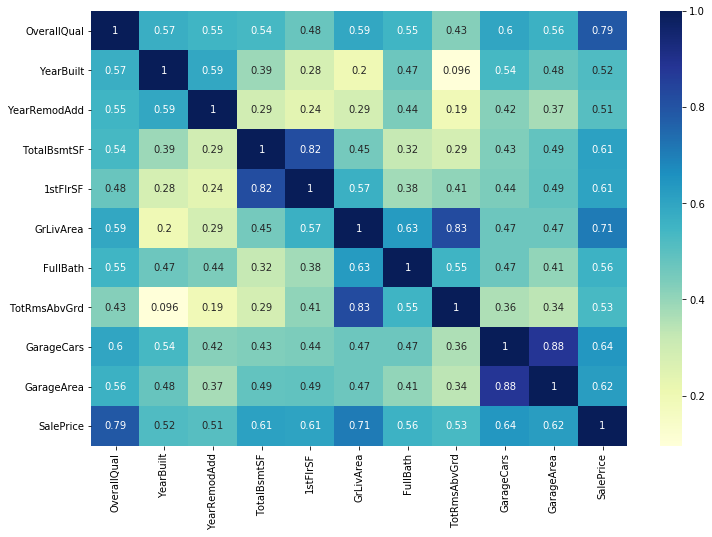

In [10]:
# Since SalePrice is our target variable, let's look at features which show more than 50% correlation with SalePrice. 
top_50 = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = Surprise_housing[top_50].corr()
sns.heatmap(top_corr,cmap="YlGnBu", annot=True)
plt.show()

From the heatmap plotted above, we can see that SalePrice is highly correlated to OverallQual (79%).

### Data Cleaning Steps & EDA

### 1. Visualising Categorical Variables
#### Univariate analysis

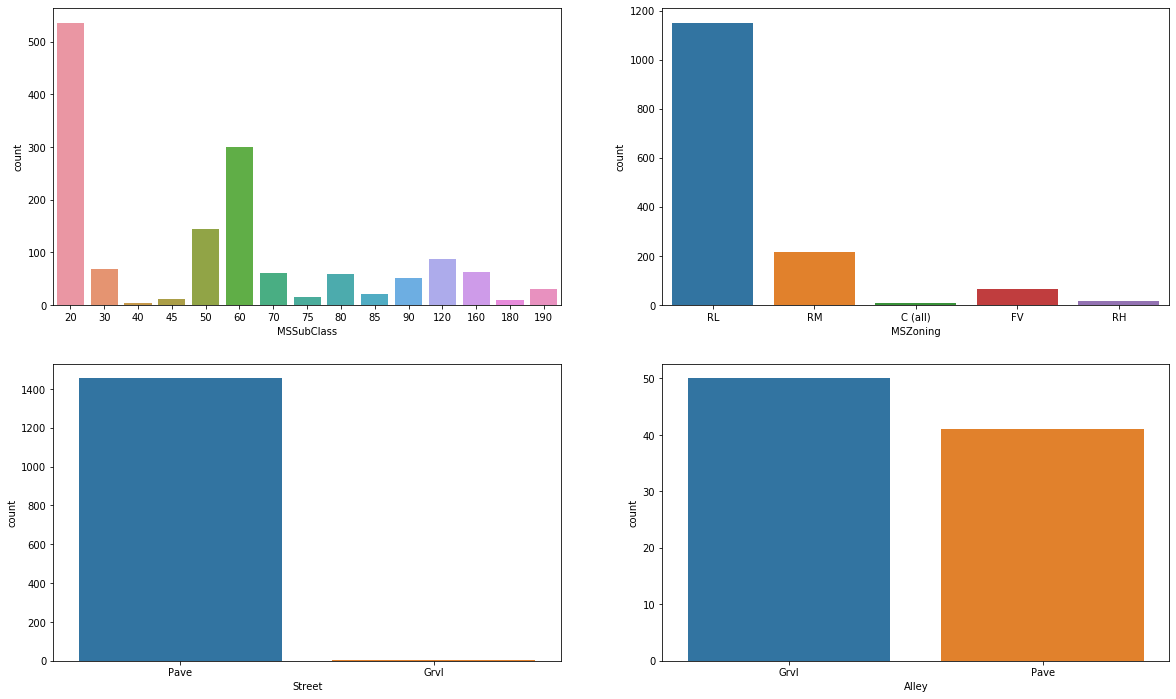

In [11]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='MSSubClass', data=Surprise_housing)

plt.subplot(2, 2, 2)
sns.countplot(x='MSZoning', data=Surprise_housing)

plt.subplot(2, 2, 3)
sns.countplot(x='Street', data=Surprise_housing)

plt.subplot(2, 2, 4)
sns.countplot(x='Alley', data=Surprise_housing)

plt.show()

Conclusion:
- As observed the count is most for MSSubClass as 20,
- MSZoning as RL i.e. Residential Low Density, 
- Street is mostly Paved and mostly houses have No Alley access

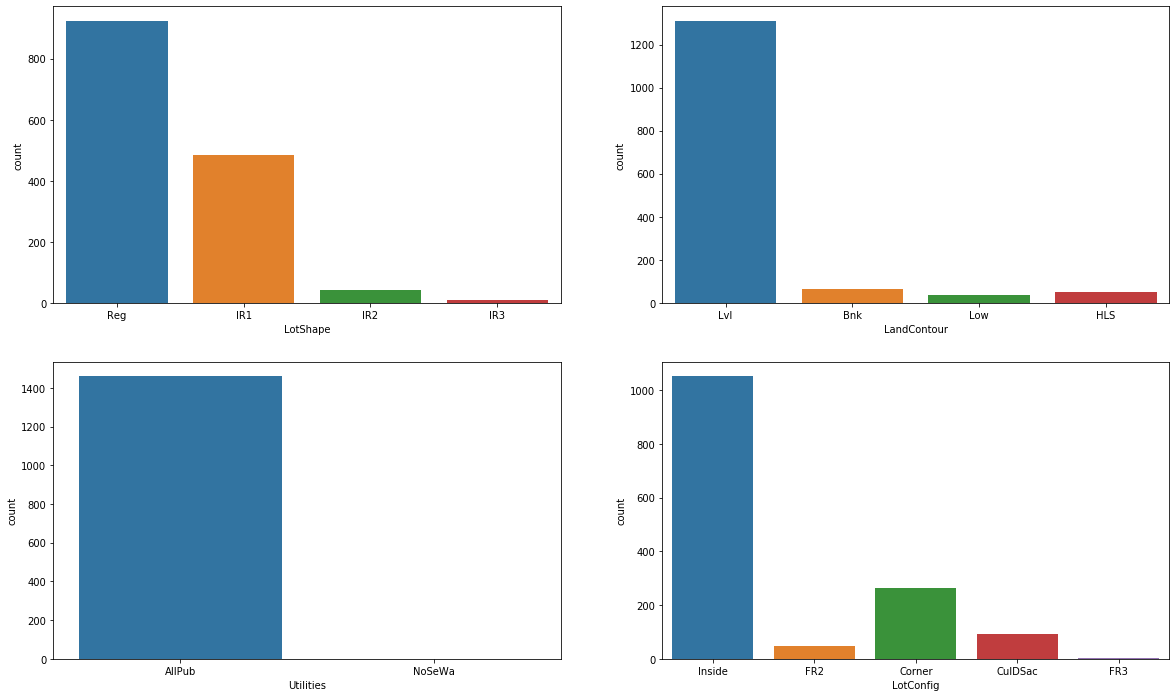

In [12]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='LotShape', data=Surprise_housing)

plt.subplot(2, 2, 2)
sns.countplot(x='LandContour', data=Surprise_housing)

plt.subplot(2, 2, 3)
sns.countplot(x='Utilities', data=Surprise_housing)

plt.subplot(2, 2, 4)
sns.countplot(x='LotConfig', data=Surprise_housing)

plt.show()

Conclusion:
- As observed the count is most for LotShape as Regular, 
- LandContourNear Flat/Level as Near Flat/Level, 
- Utilities is mostly AllPub and LotConfig is mostly Inside

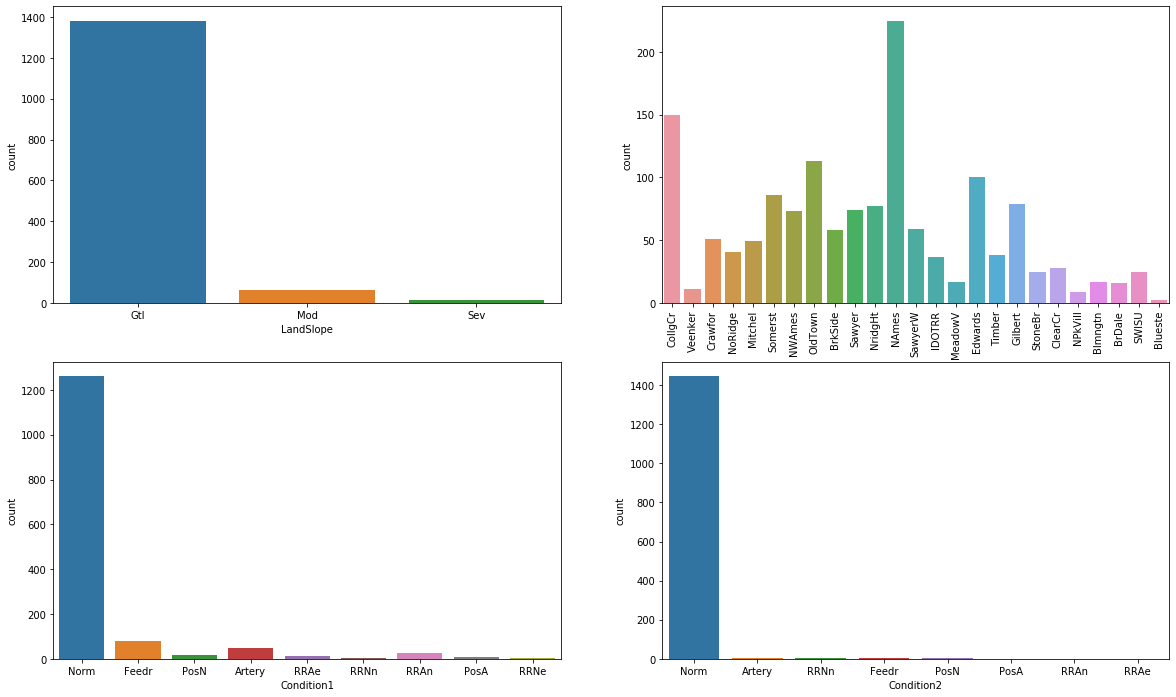

In [13]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='LandSlope', data=Surprise_housing)

plt.subplot(2, 2, 2)
sns.countplot(x='Neighborhood', data=Surprise_housing)
plt.xticks(rotation = 90)

plt.subplot(2, 2, 3)
sns.countplot(x='Condition1', data=Surprise_housing)

plt.subplot(2, 2, 4)
sns.countplot(x='Condition2', data=Surprise_housing)

plt.show()

Conclusion:
- As observed Land Shape for most houses is Gentle, 
- Neighborhood is Northwest Ames, 
- Condition1 is Normal and Condition2 is Normal

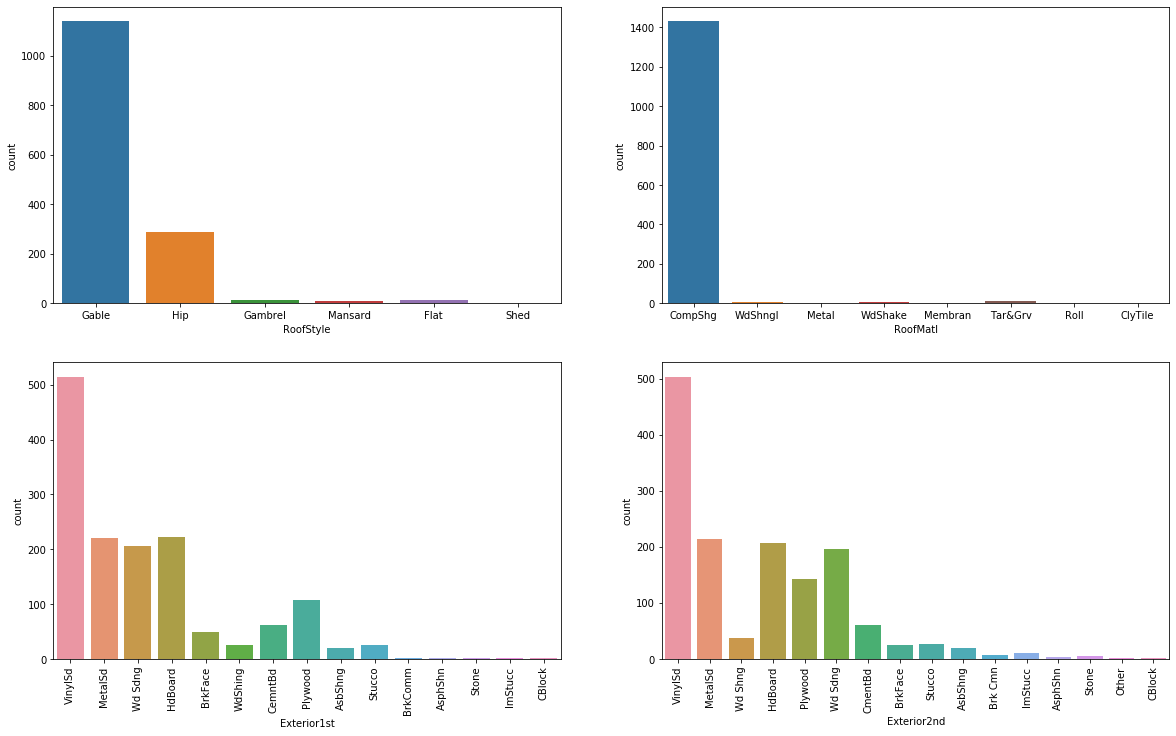

In [14]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='RoofStyle', data=Surprise_housing)

plt.subplot(2, 2, 2)
sns.countplot(x='RoofMatl', data=Surprise_housing)

plt.subplot(2, 2, 3)
sns.countplot(x='Exterior1st', data=Surprise_housing)
plt.xticks(rotation = 90)

plt.subplot(2, 2, 4)
sns.countplot(x='Exterior2nd', data=Surprise_housing)
plt.xticks(rotation = 90)

plt.show()

Conclusion:
- As observed RoofStyle is mostly Gable, 
- RoofMatl is mostly Standard (Composite) Shingle, 
- Exterior1st is VinylSd and Exterior2nd is VinylSd.

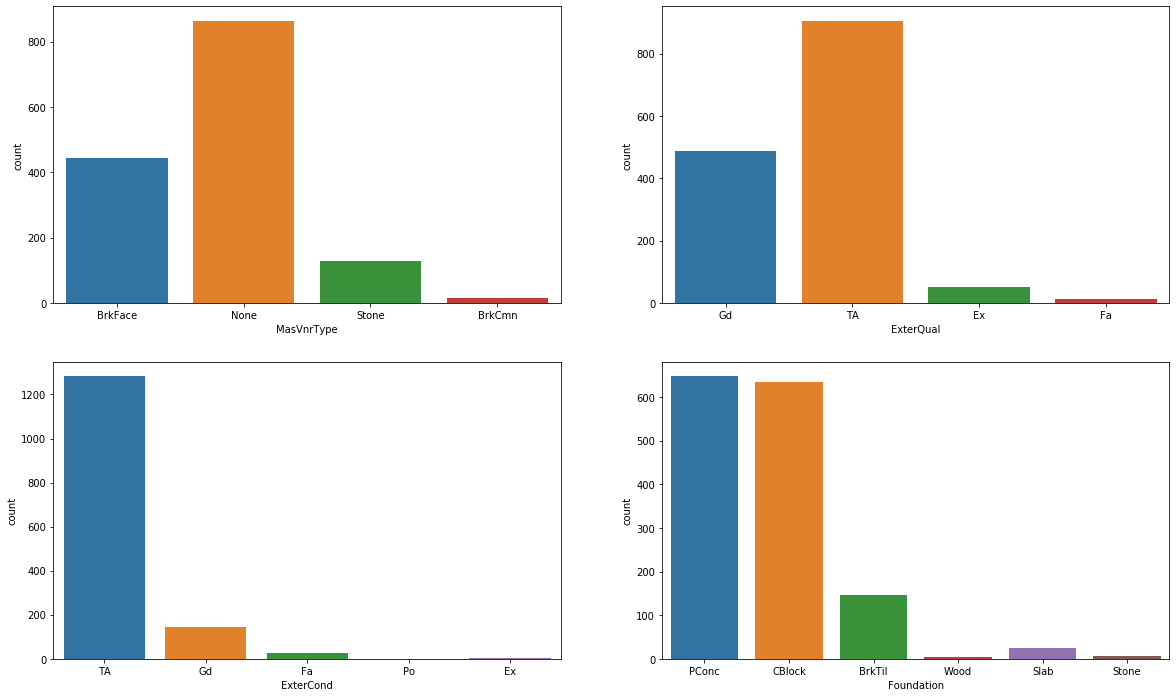

In [15]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='MasVnrType', data=Surprise_housing)

plt.subplot(2, 2, 2)
sns.countplot(x='ExterQual', data=Surprise_housing)

plt.subplot(2, 2, 3)
sns.countplot(x='ExterCond', data=Surprise_housing)

plt.subplot(2, 2, 4)
sns.countplot(x='Foundation', data=Surprise_housing)

plt.show()

Conclusion:
- As observed MasVnrType is mostly None, 
- ExterQual is Typical, 
- ExterCond is Typical and Foundation is mostly Poured Contrete or Cinder Block

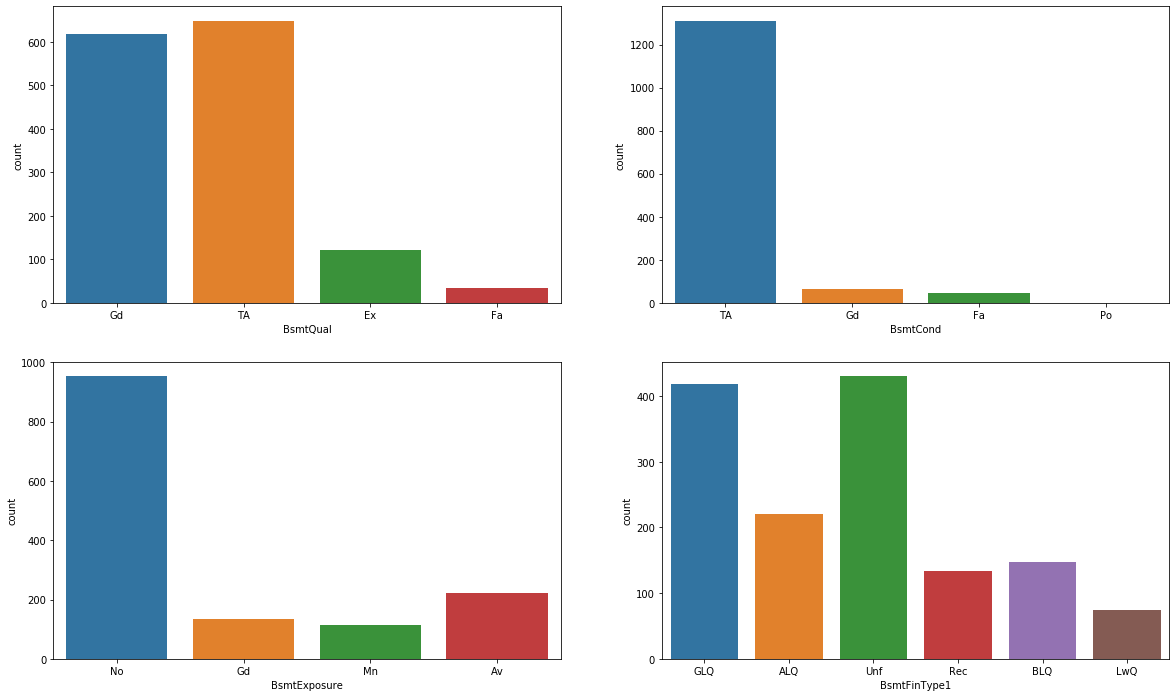

In [16]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='BsmtQual', data=Surprise_housing)

plt.subplot(2, 2, 2)
sns.countplot(x='BsmtCond', data=Surprise_housing)

plt.subplot(2, 2, 3)
sns.countplot(x='BsmtExposure', data=Surprise_housing)

plt.subplot(2, 2, 4)
sns.countplot(x='BsmtFinType1', data=Surprise_housing)

plt.show()

Conclusion:
- As observed BsmtQual is mostly Typical or Good, 
- BsmtCond is Typical, 
- BsmtExposure is no and BsmtFinType1 is mostly BsmtFinType1 or Unfinshed

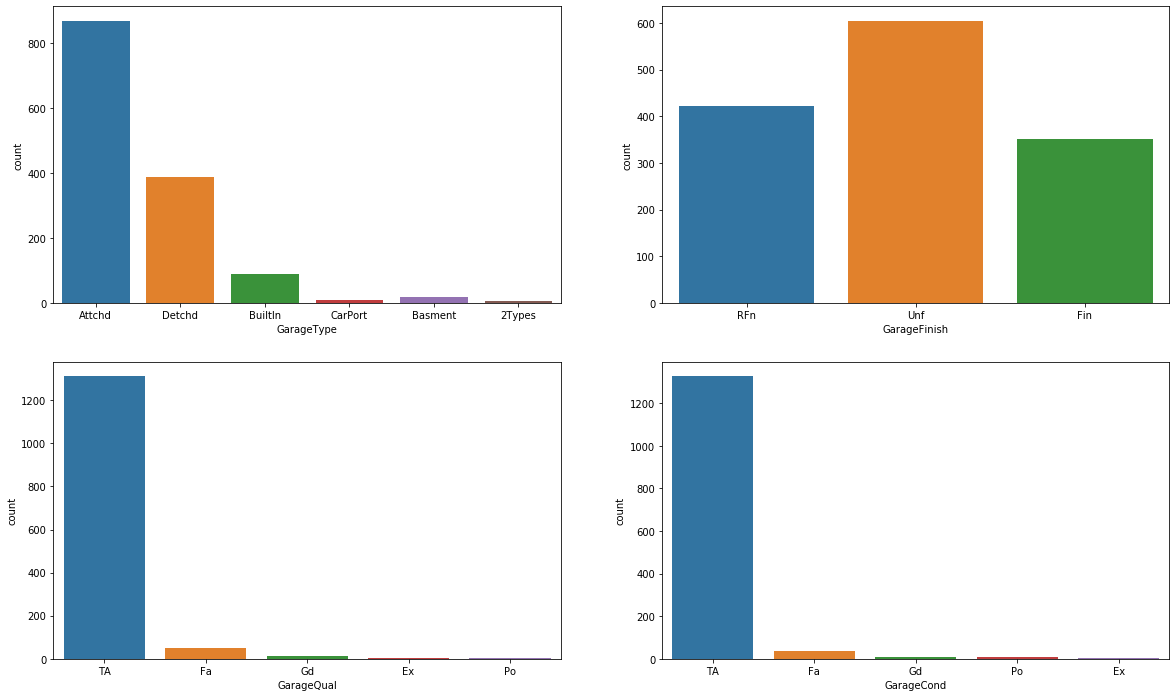

In [17]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='GarageType', data=Surprise_housing)

plt.subplot(2, 2, 2)
sns.countplot(x='GarageFinish', data=Surprise_housing)

plt.subplot(2, 2, 3)
sns.countplot(x='GarageQual', data=Surprise_housing)

plt.subplot(2, 2, 4)
sns.countplot(x='GarageCond', data=Surprise_housing)

plt.show()

Conclusion:
- As observed GarageType is mostly Attached to home, 
- GarageFinish is mostly Unfinished, 
- GarageQual is mostly Typical and GarageCond is mostly Typical

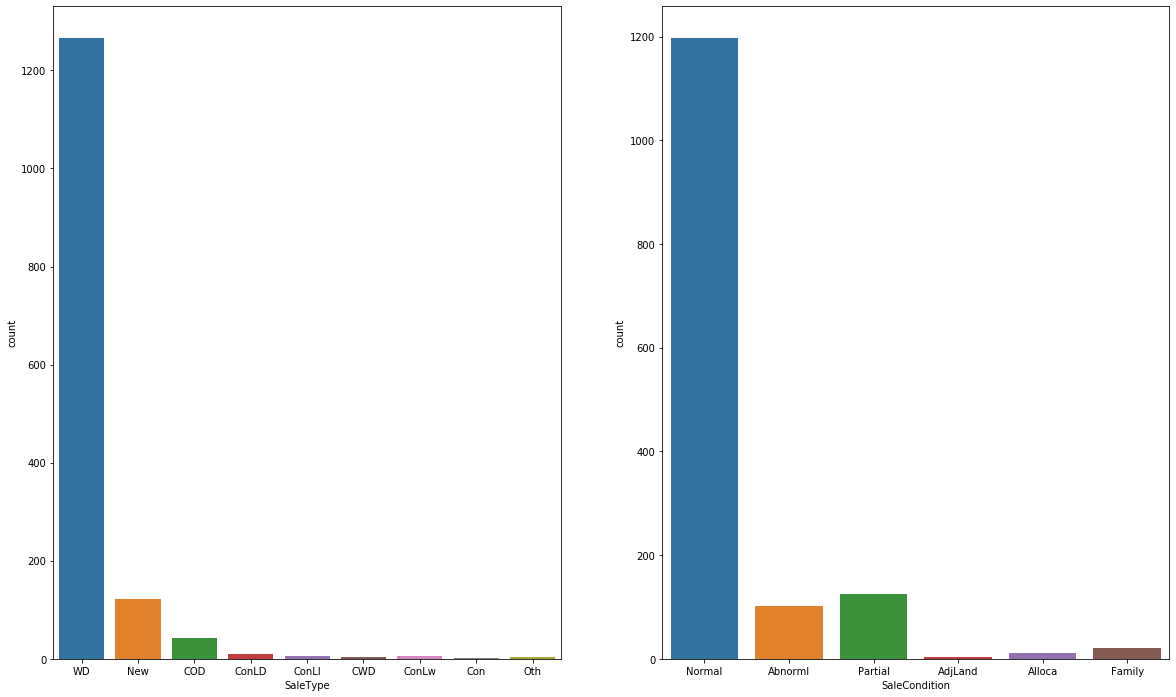

In [18]:
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
sns.countplot(x='SaleType', data=Surprise_housing)

plt.subplot(1, 2, 2)
sns.countplot(x='SaleCondition', data=Surprise_housing)

plt.show()

Conclusion:
- As observed SaleType is mostly Warranty Deed - Conventional and SaleCondition is mostly Normal

In [19]:
### 2.Analysing Numerical variables

#### Analysing Sale Price of the houses on the basis of the year it is built

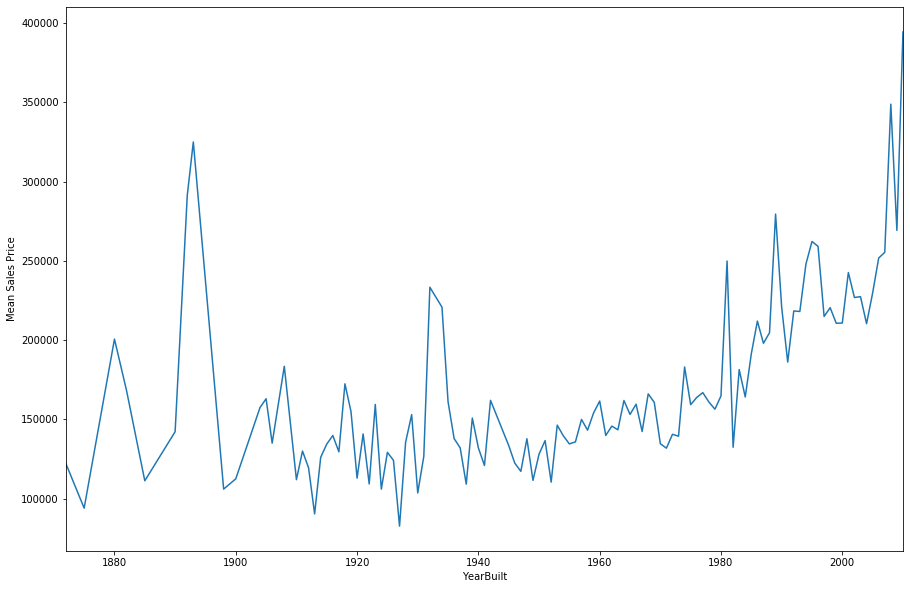

In [20]:
# mean sales price year-wise 
numeric_vars = Surprise_housing.select_dtypes(['float64','int64'])
plt.figure(figsize = (15,10))
numeric_vars.groupby(['YearBuilt'])['SalePrice'].mean().plot('line')
plt.ylabel('Mean Sales Price')
plt.show()

Conclusion:
- new houses have higher prices

In [21]:
#### Analysing Basement Area

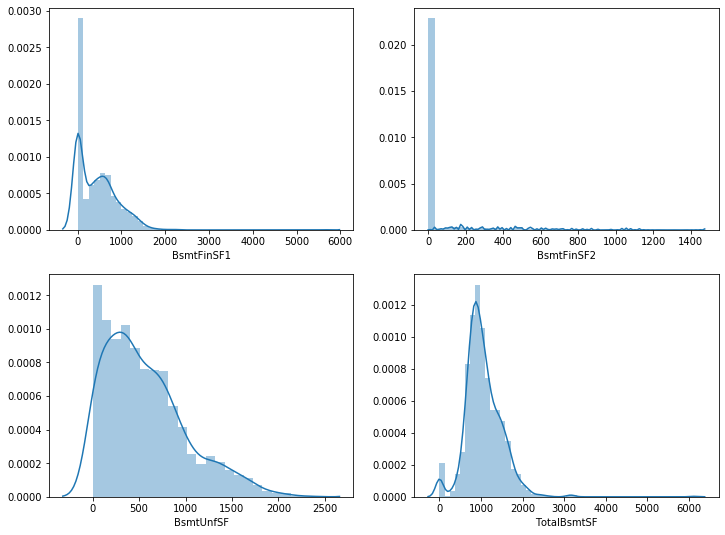

In [22]:
plt.figure(figsize = (12,9))
plt.subplot(2,2,1)
sns.distplot(numeric_vars['BsmtFinSF1'])
plt.subplot(2,2,2)
sns.distplot(numeric_vars['BsmtFinSF2'])
plt.subplot(2,2,3)
sns.distplot(numeric_vars['BsmtUnfSF'])
plt.subplot(2,2,4)
sns.distplot(numeric_vars['TotalBsmtSF'])
plt.show()

In [23]:
# Since "BsmtFinSF2" shows no variance therefore dropping this column
Surprise_housing = Surprise_housing.drop(['BsmtFinSF2'], axis = 1)

#### Analysing how basement area is affecting the sale price of the houses

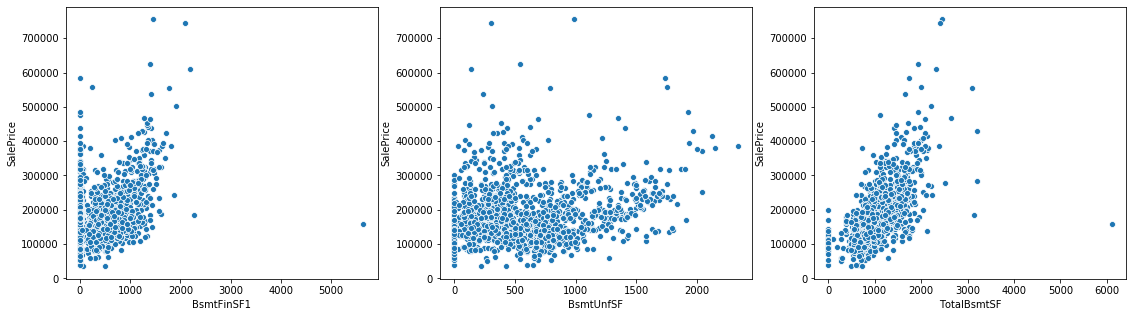

In [24]:
plt.figure(figsize = (19,5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'BsmtFinSF1', y = 'SalePrice', data = numeric_vars)
plt.subplot(1,3,2)
sns.scatterplot(x = 'BsmtUnfSF', y = 'SalePrice', data = numeric_vars)
plt.subplot(1,3,3)
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = numeric_vars)
plt.show()

Conclusion:
- Basement area does not really affecting the sale price of the houses
- As mostly the basement area of the houses are between 0 to 2000 range

#### Analysing the columns having following meanings:
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet

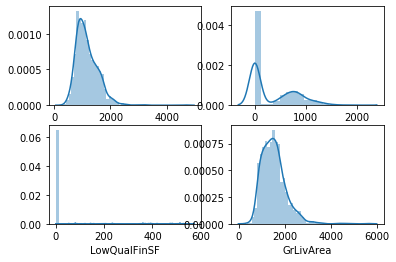

In [25]:
plt.subplot(2,2,1)
sns.distplot(numeric_vars['1stFlrSF'])
plt.subplot(2,2,2)
sns.distplot(numeric_vars['2ndFlrSF'])
plt.subplot(2,2,3)
sns.distplot(numeric_vars['LowQualFinSF'])
plt.subplot(2,2,4)
sns.distplot(numeric_vars['GrLivArea'])
plt.show()

In [26]:
# Dropping the column "LowQualFinSF" as it has no value to the data set
Surprise_housing = Surprise_housing.drop(['LowQualFinSF'], axis = 1)

#### Analysing the columns with the sale price having following meanings:
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade

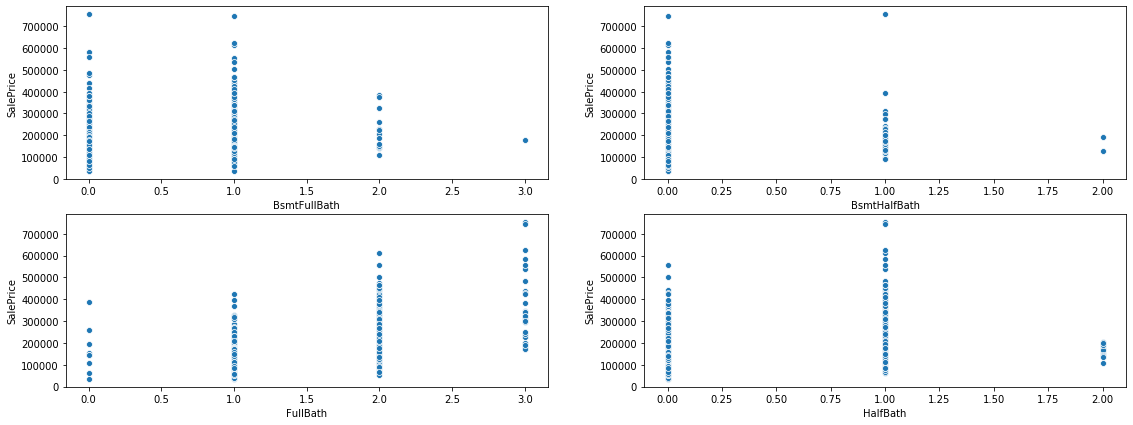

In [27]:
plt.figure(figsize = (19,7))
plt.subplot(2,2,1)
sns.scatterplot(x = 'BsmtFullBath', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,2)
sns.scatterplot(x = 'BsmtHalfBath', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,3)
sns.scatterplot(x = 'FullBath', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,4)
sns.scatterplot(x = 'HalfBath', y = 'SalePrice', data = numeric_vars)
plt.show()

#### Analysing the columns with the sale price having following meanings:
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Fireplaces: Number of fireplaces
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet

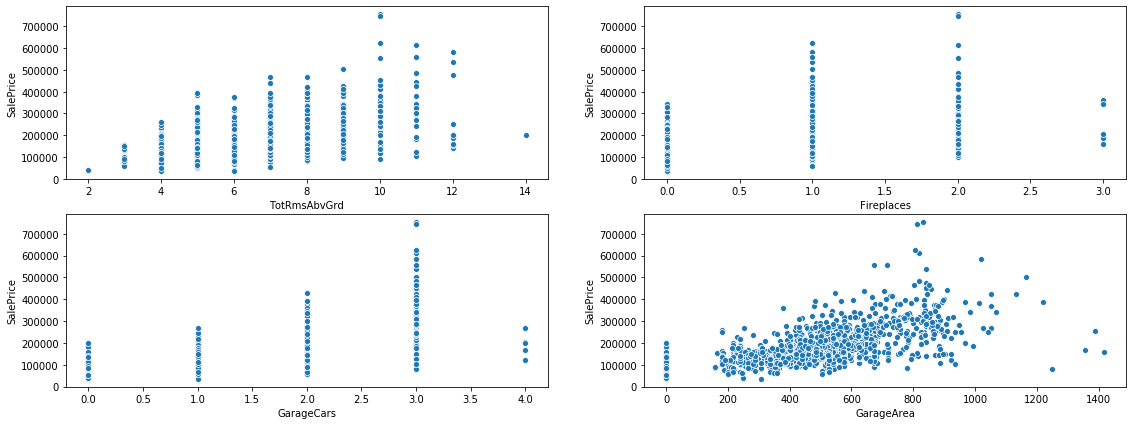

In [28]:
plt.figure(figsize = (19,7))
plt.subplot(2,2,1)
sns.scatterplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,2)
sns.scatterplot(x = 'Fireplaces', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,3)
sns.scatterplot(x = 'GarageCars', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,4)
sns.scatterplot(x = 'GarageArea', y = 'SalePrice', data = numeric_vars)
plt.show()

#### Analysing columns which has following meanings:
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet

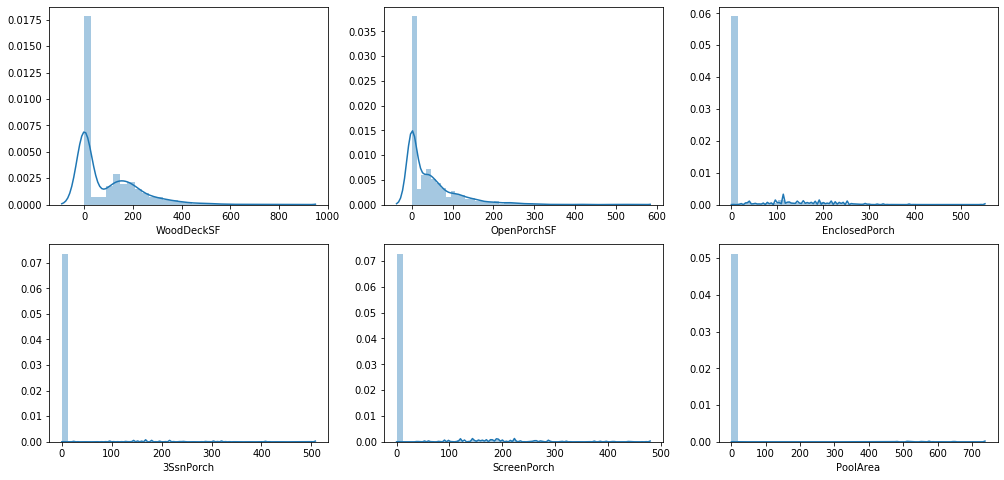

In [29]:
plt.figure(figsize = (17,8))
plt.subplot(2,3,1)
sns.distplot(numeric_vars['WoodDeckSF'])
plt.subplot(2,3,2)
sns.distplot(numeric_vars['OpenPorchSF'])
plt.subplot(2,3,3)
sns.distplot(numeric_vars['EnclosedPorch'])
plt.subplot(2,3,4)
sns.distplot(numeric_vars['3SsnPorch'])
plt.subplot(2,3,5)
sns.distplot(numeric_vars['ScreenPorch'])
plt.subplot(2,3,6)
sns.distplot(numeric_vars['PoolArea'])
plt.show()

In [30]:
# Dropping (EnclosedPorch, 3SsnPorch, ScreenPorch and PoolArea) because of their low variance
Surprise_housing = Surprise_housing.drop(['EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea'], axis = 1)

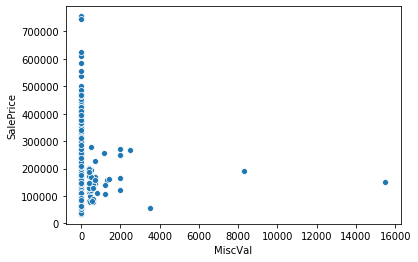

In [31]:
sns.scatterplot(x = 'MiscVal', y = 'SalePrice', data = numeric_vars)

In [32]:
# Dropping columns "BsmtFullBath" and "BsmtHalfBath" as it is adding less value to the data set
Surprise_housing = Surprise_housing.drop(['MiscVal','Id','BedroomAbvGr','KitchenAbvGr'], axis = 1)

### 3. Missing values treatment
#### Count and Percentage of Missing Values

In [33]:
# Checking Column-wise Total Count and Percentage of Missing Values
count = pd.DataFrame(Surprise_housing.isnull().sum().sort_values(ascending=False), columns=['null_counts'])
percent = pd.DataFrame(round(100*(Surprise_housing.isnull().sum()/Surprise_housing.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['null_percentage'])
Missing_Value_Table = pd.concat([count, percent], axis = 1)
Missing_Value_Table.head(20)

,null_counts,null_percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
GarageYrBlt,81,5.55


In order to effectively train our model we build, we must first deal with the missing values. There are missing values for both numerical and categorical data. For numerical imputing, we would typically fill the missing values with a measure like median, mean, or mode. For categorical columns will see how to deal with.

- First we will drop "Alley", "PoolQC", "Fence" and "MiscFeature" as they have a high percentage of null values (i.e greater than 80%). 
- Although here, from the data dictionary we can understand that the null values have significance as Null in "Alley" means No Alley, in "PoolQC" means No Pool, in "Fence" means no fence and in "MiscFeature" means none. 
- However, even if we impute it these columns will show no variance and hence we will drop them directly

In [34]:
# Checking for unique values in "Alley" column
Surprise_housing['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [35]:
# Checking for unique values in "PoolQC" column
Surprise_housing['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [36]:
# Checking for unique values in "Fence" column
Surprise_housing['Fence'].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [37]:
# Checking for unique values in "MiscFeature" column
Surprise_housing['MiscFeature'].value_counts(dropna=False)

NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [38]:
# Dropping the columns with null values greater than 80%.
Surprise_housing=Surprise_housing.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1)

# checking the shape after dropping the columns
Surprise_housing.shape

(1460, 67)

In [39]:
# Looking at the unique values in 'FireplaceQu' column
Surprise_housing['FireplaceQu'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [40]:
# Checking the values in "Fireplaces" column corresponding to the null values in "FireplaceQu" column
Surprise_housing.loc[Surprise_housing['FireplaceQu'].isnull(),['Fireplaces','FireplaceQu']].head(10)

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


Conclusion:
- From above we can see that Fireplace Quality is null because fireplace is not present (value is 0). From the data dictionary we can see that No Fireplace is indicated by "NA". Hence, we will impute the null values with "Not_Present"

In [41]:
# Replacing the null values in the "FireplaceQu" column with "Not_Present"
Surprise_housing['FireplaceQu'].fillna('Not_Present',inplace=True)

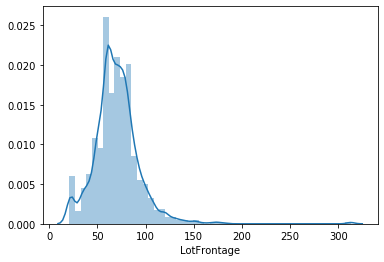

In [42]:
# Visualising LotFrontage 
sns.distplot(Surprise_housing['LotFrontage'].dropna())
plt.show()

LotFrontage is nothing but Linear feet of street connected to property. It is a continuous column and has got 17.7 percentage of Null values present. We can see for the distribution of this feature.

Conclusion:
- We know 17.7% of the records are missing with values for LotFrontage. This would be a lot of records to be dropped if we proceed records with missing values. 
- And if we impute these missing values with value 0 indicating unknown maybe, we would be altering the distribution for the feature.
- Hence we can find out the mean of the LotFrontage and impute the missing value with the mean so that the distribution remains intact.

In [43]:
# Filling the null values in "LotFrontage" column with the median values.
Surprise_housing['LotFrontage'] = Surprise_housing['LotFrontage'].fillna(Surprise_housing['LotFrontage'].mean())

#### Moving ahead wrt GarageType, GarageYrBlt, GarageFinish, GarageCond and GarageQual are attributes related to Garage and all of them are having same percenatge of missing values. This implies that the garrage does not exist in such house.

- GarageYrBlt: Year garage was built (Categorical)
- GarageType: Garage location (Categorical)
- GarageFinish: Interior finish of the garage(Categorical)
- GarageArea: Size of garage in square feet (Numerical)
- GarageQual: Garage quality(Categorical)

As per Data definition NA in these fields means no garage

- GarageFinish: NA means "None"
- GarageQual: NA means "None"
- GarageCond: NA means "None"
- GarageYrBlt: NA means 0
- GarageType: NA means "None

In [44]:
# Checking for values in Garage related columns corresponding to the null values in "GarageType" column
Surprise_housing.loc[Surprise_housing['GarageType'].isnull(),['GarageType','GarageYrBlt','GarageFinish','GarageCars',
                                                              'GarageArea','GarageQual','GarageCond']].head(10)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


Conlusion:
- Since the values are null for all garage related columns, we can conclude that there is no garage. 
- Hence, we will impute "GarageType", "GarageFinish", "GarageQual", "GarageCond" with a new level 'Not Present' indicating no garage as per the data dictionary.

In [45]:
# Imputing null values in the above columns with "Not_Present"
Surprise_housing.loc[Surprise_housing.GarageType.isnull() , ['GarageType','GarageFinish','GarageQual',
                                                             'GarageCond']] = 'Not_Present'

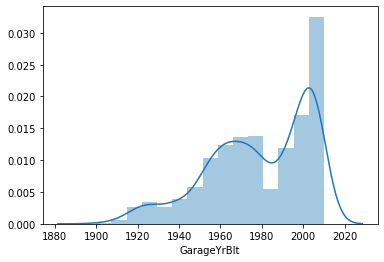

In [46]:
# Visualising GarageYrBlt 
sns.distplot(Surprise_housing['GarageYrBlt'].dropna())
plt.show()

Conclusion:
- We can see same percentage of null values for each of the features of Garage including GarageYrBlt. 
- Hence GarageYrBlt would be having missing values for those houses that dont have garage and for which other garage features are NULL as well. 
- We can see that there is no garage and hence there are null values in the Garage Year built column. We will impute it with the current year such that the age is 0.

In [47]:
# Imputing the null values with 2020
Surprise_housing["GarageYrBlt"].fillna(2020, inplace=True)

We can see from the data dictionary that for the features of Basement null values indicate the houses without Basement. And hence we can replace the null values with a new level 'Not_Present'.

#### Moving ahead with attributes related to basement
- BsmtQual: Evaluates the height of the basement
- BsmtFinType1: Rating of basement finished area
- BsmtCond: Evaluates the general condition of the basement

All three are basement categorcial features with the same missing values percentages, so "NA" implies no basement for these houses

In [48]:
# Replacing NA in BsmtExposure, BsmtFinType2,  BsmtFinType1, BsmtCond, BsmtQual with 'Not_Present' since NA means 'No basement'.
Surprise_housing.loc[Surprise_housing.BsmtQual.isnull() , ['BsmtQual','BsmtCond','BsmtExposure',
                                                           'BsmtFinType1','BsmtFinType2']]="Not_Present"

- BsmtFinType2 : Rating of basement finished area (if multiple types)
- BsmtExposure : Refers to walkout or garden level walls

Both are categorical basement feature with same missing percenatges , "NA" means no basement

In [49]:
Surprise_housing['BsmtExposure'].replace(np.nan,'Not Present',inplace=True)
Surprise_housing['BsmtFinType2'].replace(np.nan,'Not Present',inplace=True)

In [50]:
# Checking the values in "MasVnrType" column corresponding to null values in "MasVnrArea" column 
Surprise_housing.loc[Surprise_housing.MasVnrArea.isnull(), ['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [51]:
# checking the values in "MasVnrArea" corresponding the "None" values in "MasVnrType" column
Surprise_housing.loc[Surprise_housing.MasVnrType == 'None', ['MasVnrArea','MasVnrType']].head()

,MasVnrArea,MasVnrType
1,0.0,None
3,0.0,None
5,0.0,None
8,0.0,None
9,0.0,None


Conclusion:
- MasVnrType: Masonry veneer type (Categorical)
- MasVnrArea: Masonry veneer area in square feet (Numerical)

Missing values in those features mean that there is no masonry veneer in those houses.

In [52]:
# Imputing the null values in "MasVnrType" with "None".
Surprise_housing['MasVnrType'].fillna('None',inplace=True)

In [53]:
# Imputing the "MasVnrArea" column with 0.
Surprise_housing['MasVnrArea'].fillna(0,inplace=True)

In [54]:
# Looking at the unique values in 'Electrical' column
Surprise_housing['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [55]:
# Replacing the null values in the "Electrical" column with the mode which is Standard Circuit Breakers & Romex(SBrkr)
Surprise_housing['Electrical'].fillna('SBrkr',inplace=True)

In [56]:
# Lets Check Missing Values again

round(100 * (Surprise_housing.isnull().sum() / len(Surprise_housing.index)),2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
KitchenQual  

Conclusion:
- We can find that there are no more missing values in the dataset. Hence we have successfully cleaned the dataset.

In [57]:
# Storing the current year in a variable
import datetime
today = str(datetime.date.today())
CurrentYear = int(today[:4])
CurrentYear

2020

### 4. Deriving New metrics
#### Handling the Year columns

In [58]:
# Processing Year columns to get the 'age' of respective feature (Current year = 2020)
Surprise_housing['AgeBuilt'] = CurrentYear - Surprise_housing['YearBuilt']

#converting "YearRemodAdd" variable into the number of years since the property was remodelled.
Surprise_housing['AgeRemodAdd'] = CurrentYear - Surprise_housing['YearRemodAdd']

#Converting "GarageYrBlt" column into age of the garage where 0 happens to be the abscence of a garage
Surprise_housing['Garage_Age'] = CurrentYear - Surprise_housing['GarageYrBlt']

#Converting "YrSold" into the number of years since the property was sold
Surprise_housing['AgeSold'] = CurrentYear - Surprise_housing['YrSold']

# Dropping original year columns
Surprise_housing = Surprise_housing.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'],axis=1)

In [59]:
#The column MoSold (Month Sold) might not add any value to us. What we actually care about is the year.
#Hence we can drop the Month column
Surprise_housing.drop('MoSold',inplace=True, axis=1)

In [60]:
# data distribution in Street column
Surprise_housing['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [61]:
# data distribution in Utilities column
Surprise_housing['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [62]:
# based on data distribution in each column seen earlier 
# We have found out that 'Street','Utilities' have very low variance 
# And Id column has all unique values
# So let's drop these columns as they won't be that usefull for analysis
Surprise_housing = Surprise_housing.drop(['Street','Utilities'], axis=1)

In [63]:
# change data type for MSSubClass to object as it is categorical variable
Surprise_housing[['MSSubClass']] = Surprise_housing[['MSSubClass']].astype('object')

In [64]:
Surprise_housing.shape

(1460, 64)

#### 5. Checking if the target variable is normally distributed or not

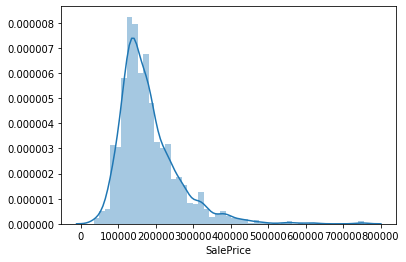

In [65]:
sns.distplot(Surprise_housing['SalePrice'])
plt.show()

Conclusion:
- The distribution is a bit skewed towards left. We can transform it to represent a normal distribution.
- Lets try with a very general transformation function log and see if that helps here

In [66]:
print("Skewness: %f" % Surprise_housing['SalePrice'].skew())
print("Kurtosis: %f" % Surprise_housing['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


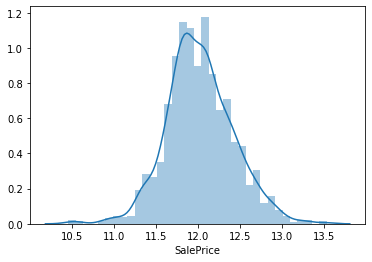

In [67]:
sns.distplot( np.log(Surprise_housing.SalePrice))
plt.show()

Conclusion:
- So with log, the distribution appears close to normal. So we can use this transformation for our target variable and move ahead
- All predictions by the model will then be in log values and we will need to take the antilog ro get the actual value

### Creating Dummies

In [68]:
#regenerating list of numerical and non-numerical columns
Categorical_Cols = []
NumCols = []

for col in list(Surprise_housing):
    if Surprise_housing[col].dtypes == 'object':
        Categorical_Cols.append(col)  
    else:
        NumCols.append(col)
print('Categorical columns:\n',Categorical_Cols)

print('Numerical columns:\n',NumCols)

Categorical columns:
 ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'AgeBuilt', 'AgeRemodAdd', 'Garage_Age', 'AgeSold']


In [69]:
#To get dummies for all other categorical variables
df_dummy = pd.get_dummies(Surprise_housing[Categorical_Cols], drop_first=True)

In [70]:
#Concating the dataframe with dummies with the the original dataframe (df_dropped)
df_concat = pd.concat([Surprise_housing, df_dummy], axis=1)
df_concat.shape

(1460, 288)

In [71]:
#Let's drop the original columns from where dummies are created
df_final = df_concat.drop(Categorical_Cols, axis = 1)
df_final.shape

(1460, 250)

### Train-Test Split

In [72]:
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 249)
X_test Shape: (438, 249)
y_train Shape: (1021,)
y_test Shape: (438,)


In [74]:
X_train.head(3)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeBuilt,AgeRemodAdd,Garage_Age,AgeSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not_Present,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Not_Present,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not Present,BsmtExposure_Not_Present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not_Present,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Not Present,BsmtFinType2_Not_Present,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not_Present,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not_Present,GarageFinish_Not_Present,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Not_Present,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Not_Present,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,Sa

In [75]:
y_train.head(3)

210     98000
318    260000
239    113000
Name: SalePrice, dtype: int64

### Scaling

In [76]:
scaler = StandardScaler()

In [77]:
#Scaling the numerical columns
NumCols1 = NumCols.copy()
NumCols1.remove('SalePrice')
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeBuilt,AgeRemodAdd,Garage_Age,AgeSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not_Present,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Not_Present,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not Present,BsmtExposure_Not_Present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not_Present,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Not Present,BsmtFinType2_Not_Present,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not_Present,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not_Present,GarageFinish_Not_Present,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Not_Present,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Not_Present,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,Sa

In [78]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeBuilt,AgeRemodAdd,Garage_Age,AgeSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not_Present,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Not_Present,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not Present,BsmtExposure_Not_Present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not_Present,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Not Present,BsmtFinType2_Not_Present,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not_Present,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not_Present,GarageFinish_Not_Present,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Not_Present,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Not_Present,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,Sa

### Model Building and Evaluation

### Ridge Regression

In [79]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014037,0.003532,0.002340,0.001914,0.0001,{'alpha': 0.0001},-19233.183430,-20745.051151,-22002.526994,-21708.867611,-18181.204304,-20373.049182,1461.326333,27,-11956.751295,-11407.895809,-12036.271280,-12098.987160,-11787.092013,-11857.399511,247.881908
1,0.009711,0.002824,0.001597,0.001956,0.001,{'alpha': 0.001},-19158.706026,-20736.157324,-21919.206109,-21573.727755,-18162.378776,-20308.907549,1435.430814,25,-11954.196174,-11407.736362,-12021.662093,-12089.473620,-11787.932898,-11852.200230,243.761185
2,0.016065,0.002784,0.004738,0.003113,0.01,{'alpha': 0.01},-18691.415997,-20659.991745,-21465.328261,-20573.056211,-18218.287089,-19920.410964,1246.365800,13,-12107.225476,-11408.355427,-12047.088008,-12099.670779,-11948.811715,-11922.230281,263.086200
3,0.017165,0.000958,0.001791,0.002215,0.05,{'alpha': 0.05},-19015.393984,-20569.795570,-21451.999170,-19369.689713,-19210.154913,-19922.517333,937.439177,14,-13040.230160,-11423.339385,-12831.783722,-12796.780887,-12854.858517,-12589.398534,589.095937
4,0.015494,0.002715,0.003209,0.002169,0.1,{'alpha': 0.1},-19441.849784,-20480.425838,-21623.002128,-19104.166834,-19862.579074,-20101.757763,888.112030,17,-13656.567445,-11447.597285,-13414.415946,-13417.430210,-13505.136178,-13088.229413,825.016844


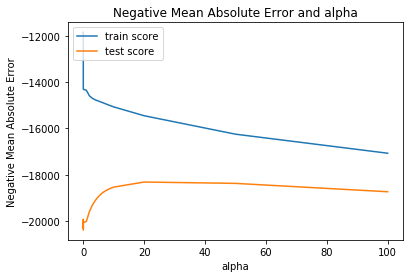

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [82]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.36234067e+03,  4.07186858e+03,  1.57213105e+04,  5.34487886e+03,
        4.05166735e+03, -2.96177232e+03, -1.13720936e+03,  3.26016037e+03,
        7.54124691e+03,  1.64099748e+04,  1.38347435e+04,  5.22289613e+03,
        6.16509002e+02,  2.96798762e+03,  1.05810141e+03,  1.02377702e+02,
        2.17610931e+03,  1.01092791e+04, -8.08192635e+02,  1.66902160e+03,
       -5.04261837e+02, -6.15578967e+03, -2.34911163e+03,  2.84790669e+02,
        1.01401981e+03,  1.47238900e+03,  5.26697773e+02,  3.85924760e+03,
        3.56670167e+03, -2.64043214e+03,  2.18702696e+03, -4.51776165e+02,
        6.90058800e+01,  7.28012368e+01, -7.96699964e+03, -1.10333656e+04,
       -1.01948821e+04, -1.52107710e+03, -7.73521902e+03,  3.89451143e+03,
        2.80825529e+03,  6.81632606e+03, -6.56846146e+02,  2.23145819e+03,
       -1.11145583e+04,  3.35235964e+02,  1.06575709e+04,  7.78273237e+03,
        1.41222394e+04,  8.84025900e+03, -8.39377643e+03, -2.35973908e+03,
       -1.59001253e+03,  

In [83]:
main_coef=pd.Series(ridge.coef_,index=X_train.columns)
main_features_ridge=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features_ridge

Neighborhood_NoRidge    30255.154937
RoofMatl_WdShngl        22715.979830
Neighborhood_NridgHt    22309.090172
Neighborhood_Crawfor    16889.826006
2ndFlrSF                16409.974818
BsmtExposure_Gd         16155.873106
OverallQual             15721.310468
HouseStyle_1Story       15661.050983
LandContour_Lvl         14122.239354
GrLivArea               13834.743532
MSSubClass_120         -11033.365579
LotShape_IR3           -11114.558292
BldgType_Twnhs         -11581.792252
Neighborhood_Mitchel   -13373.143138
Neighborhood_Edwards   -16863.637309
BsmtQual_TA            -17077.856706
KitchenQual_TA         -17999.435170
KitchenQual_Gd         -20591.769531
BsmtQual_Gd            -23334.990104
Condition2_PosN        -24771.287583
dtype: float64

### Lasso

In [84]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   30.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [85]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.250420,0.009855,0.000000,0.000000,0.0001,{'alpha': 0.0001},-19219.672893,-20701.418744,-22011.658743,-21801.885038,-18175.264641,-20380.841611,1482.593380,27,-11959.843790,-11407.709996,-12038.737758,-12104.751670,-11787.309909,-11859.670625,249.667340
1,0.258770,0.020121,0.001735,0.001213,0.001,{'alpha': 0.001},-19219.345885,-20700.680011,-22011.163861,-21794.503407,-18173.910174,-20378.783964,1481.495093,26,-11959.837488,-11407.689962,-12038.707500,-12104.750095,-11787.307647,-11859.658539,249.669569
2,0.269065,0.041514,0.005451,0.005282,0.01,{'alpha': 0.01},-19216.044496,-20693.237924,-22006.339977,-21739.280259,-18166.110662,-20363.078121,1472.509430,25,-11959.913488,-11407.606482,-12038.509591,-12104.803277,-11787.336961,-11859.633960,249.686270
3,0.272629,0.019904,0.002654,0.001486,0.05,{'alpha': 0.05},-19200.917029,-20666.623489,-21986.914119,-21719.585036,-18151.759324,-20344.039091,1469.956315,24,-11960.383750,-11407.419275,-12037.745436,-12105.164402,-11787.537643,-11859.650101,249.742033
4,0.250754,0.019748,0.001090,0.001724,0.1,{'alpha': 0.1},-19181.461459,-20635.014608,-21963.775733,-21695.321631,-18140.900539,-20322.176446,1465.148091,23,-11961.028951,-11407.257291,-12036.777899,-12105.593536,-11788.013204,-11859.734176,249.772363


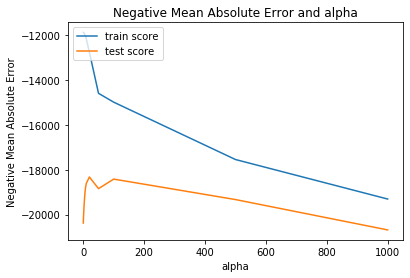

In [86]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [87]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [88]:
lasso.coef_

array([-2.18518871e+03,  4.31800490e+03,  1.52510946e+04,  5.64048066e+03,
        3.60849883e+03, -1.12442459e+03,  0.00000000e+00,  3.18628879e+03,
        1.13065742e+04,  2.02440916e+04,  9.52398886e+03,  5.02931542e+03,
        5.77145819e+02,  2.44491988e+03,  5.65984524e+02, -5.88853203e+02,
        9.04315775e+02,  9.18274957e+03, -1.55131964e+03,  1.28600220e+03,
        0.00000000e+00, -6.39345532e+03, -2.39837003e+03, -9.82774168e+02,
        8.21791259e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.98816279e+03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.50131074e+04, -7.14669984e+03,
       -5.57947027e+03, -0.00000000e+00, -1.20189246e+04,  0.00000000e+00,
        0.00000000e+00,  5.91406941e+03, -0.00000000e+00,  0.00000000e+00,
       -1.86913888e+04,  0.00000000e+00,  6.10407445e+03,  5.95985683e+03,
        1.04159652e+04,  9.40114432e+03, -5.86668486e+03, -0.00000000e+00,
       -0.00000000e+00,  

In [89]:
main_coef=pd.Series(lasso.coef_,index=X_train.columns)
main_features_lasso=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features_lasso

RoofMatl_WdShngl         62021.528773
Neighborhood_NoRidge     42745.803789
Neighborhood_NridgHt     28043.296456
Neighborhood_Crawfor     24322.458606
2ndFlrSF                 20244.091551
BsmtExposure_Gd          20139.763146
Neighborhood_Somerst     20079.126199
Neighborhood_StoneBr     18303.842819
Exterior1st_BrkFace      16038.774978
HouseStyle_1Story        15740.604142
Neighborhood_Edwards    -12300.792109
MSSubClass_90           -15013.107413
BldgType_Twnhs          -15434.718843
KitchenQual_Fa          -18259.877906
LotShape_IR3            -18691.388758
BsmtQual_TA             -18795.666548
BsmtQual_Gd             -24955.543484
KitchenQual_TA          -25298.899488
KitchenQual_Gd          -26840.566792
Condition2_PosN        -214030.791480
dtype: float64

In [90]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)
#y_pred_ridge_test = ridge.predict(X_test)

Error distribution in train dataset


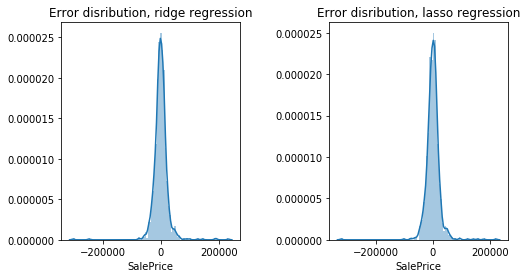

In [91]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [92]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.892792221637897
r2_score for lasso: 0.9020225475066793


In [93]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


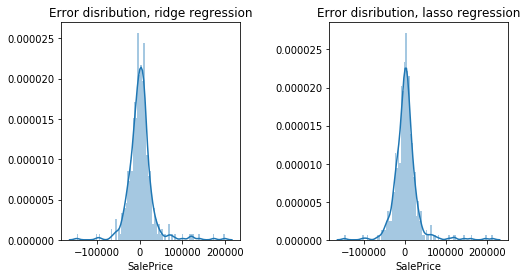

In [94]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [95]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.89
r2_score for lasso: 0.9
r2_score in test dataset:
r2_score for ridge: 0.87
r2_score for lasso: 0.86


In [96]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 173883.568),
 ('LotFrontage', -2185.189),
 ('LotArea', 4318.005),
 ('OverallQual', 15251.095),
 ('OverallCond', 5640.481),
 ('MasVnrArea', 3608.499),
 ('BsmtFinSF1', -1124.425),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 3186.289),
 ('1stFlrSF', 11306.574),
 ('2ndFlrSF', 20244.092),
 ('GrLivArea', 9523.989),
 ('BsmtFullBath', 5029.315),
 ('BsmtHalfBath', 577.146),
 ('FullBath', 2444.92),
 ('HalfBath', 565.985),
 ('TotRmsAbvGrd', -588.853),
 ('Fireplaces', 904.316),
 ('GarageCars', 9182.75),
 ('GarageArea', -1551.32),
 ('WoodDeckSF', 1286.002),
 ('OpenPorchSF', 0.0),
 ('AgeBuilt', -6393.455),
 ('AgeRemodAdd', -2398.37),
 ('Garage_Age', -982.774),
 ('AgeSold', 821.791),
 ('MSSubClass_30', 0.0),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 3988.163),
 ('MSSubClass_60', -0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', -0.0),
 ('MSSubClass_80', -0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', -15013.107),
 ('MSSubClass_120', -7146.7),
 ('MSSubClass_160',

In [97]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 173883.568),
 ('LotFrontage', -2185.189),
 ('LotArea', 4318.005),
 ('OverallQual', 15251.095),
 ('OverallCond', 5640.481),
 ('MasVnrArea', 3608.499),
 ('BsmtFinSF1', -1124.425),
 ('TotalBsmtSF', 3186.289),
 ('1stFlrSF', 11306.574),
 ('2ndFlrSF', 20244.092),
 ('GrLivArea', 9523.989),
 ('BsmtFullBath', 5029.315),
 ('BsmtHalfBath', 577.146),
 ('FullBath', 2444.92),
 ('HalfBath', 565.985),
 ('TotRmsAbvGrd', -588.853),
 ('Fireplaces', 904.316),
 ('GarageCars', 9182.75),
 ('GarageArea', -1551.32),
 ('WoodDeckSF', 1286.002),
 ('AgeBuilt', -6393.455),
 ('AgeRemodAdd', -2398.37),
 ('Garage_Age', -982.774),
 ('AgeSold', 821.791),
 ('MSSubClass_50', 3988.163),
 ('MSSubClass_90', -15013.107),
 ('MSSubClass_120', -7146.7),
 ('MSSubClass_160', -5579.47),
 ('MSSubClass_190', -12018.925),
 ('MSZoning_RL', 5914.069),
 ('LotShape_IR3', -18691.389),
 ('LandContour_HLS', 6104.074),
 ('LandContour_Low', 5959.857),
 ('LandContour_Lvl', 10415.965),
 ('LotConfig_CulDSac', 9401.144),
 ('LotConfig

In [98]:
#length of the var_coeff
len(var_coeff)

115

In [99]:
#Identifying important features, excluding dummies
final_var_list = []
for i in list(Surprise_housing):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print(final_var_list)
print(len(final_var_list))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'SaleType', 'SaleCondition', 'AgeBuilt', 'AgeRemodAdd', 'Garage_Age', 'AgeSold']
57


In [100]:
#variables with positive coefficients
pos_var = [x for x in var_coeff if x[-1] > 0]
final_var_pos = []
for i in list(Surprise_housing):
    for j in pos_var:
        if i in j[0]:
            final_var_pos.append(i)
            break
print(final_var_pos)
print(len(final_var_pos))

['MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageQual', 'WoodDeckSF', 'SaleType', 'SaleCondition', 'AgeSold']
38


In [101]:
#variables with negative coefficients
neg_var = [x for x in var_coeff if x[-1] < 0]
final_var_neg = []
for i in list(Surprise_housing):
    for j in neg_var:
        if i in j[0]:
            final_var_neg.append(i)
            break
print(final_var_neg)
print(len(final_var_neg))

['MSSubClass', 'LotFrontage', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'AgeBuilt', 'AgeRemodAdd', 'Garage_Age']
31


#### Conclusion
- Optimum value for lambda in ridge regression is 10
- Optimum value for lambda in lasso regression is 100

After creating model in both Ridge and Lasso we can see that the R2_scores are almost same for both of them but as lasso will penalize high values of the coefficients β by actually setting them to zero if they are not relevant and also help in feature selection. Lasso allows for a more interpretable model, therefore I will make predictions using lasso.

- r2_score in train dataset: r2_score for ridge: 0.89, r2_score for lasso: 0.9
- r2_score in test dataset: r2_score for ridge: 0.87, r2_score for lasso: 0.86

So, the company can purchase houses below the market value by highlighting the negative parameters.
Afterwards, the company can work little bit on the negative parameters to decrease the magnitude of negative weight and sell the houses by mainly highlighting the positive features.
